In [14]:
import os
import numpy as np
import lal
import lalsimulation
import sys
sys.path.append("../scripts")
import scipy
import matplotlib.pyplot as plt
plt.style.use("../papers/intro_paper/MATPLOTLIB_RCPARAMS.sty")

In [21]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 20. #Frequency of the 22 mode at which the signal starts
distance = 500e6*lal.PC_SI
z = 0.01
spin1_z = 0.00346990177835
spin2_z =  0.0440040414498
inclination = 153.95
deltaT = 1./4096.
domega220, dtau220 = 0., 0.
domega210, dtau210 = 0., 0.
domega330, dtau330 = 0., 0.
domega440, dtau440 = 0., 0.
domega550, dtau550 = 0., 0.
alphaNGR = 10.
pNGR = 2.

## domega220 deviation

(0.6478869977511015, 10.0, 0.0)
(0.8254901751896477, 10.0, 0.0)
(-0.7078465188087653, 10.0, 0.0)
(0.42167137543196453, 10.0, 0.0)
(0.28476423526593475, 10.0, 0.0)
(0.8598297783211639, 10.0, 0.0)
(0.9547699116983812, 10.0, 0.0)
(-0.9166557148219125, 10.0, 0.0)
(-0.04603425447247966, 10.0, 0.0)
(0.39788901886265604, 10.0, 0.0)
(0.489984751946382, 10.0, 0.0)
(0.024442299792646116, 10.0, 0.0)
(0.029313834669082217, 10.0, 0.0)
(-0.9588631064729907, 10.0, 0.0)
(-0.290691104307758, 10.0, 0.0)
(-0.1861980023763845, 10.0, 0.0)
(-0.9447720259076564, 10.0, 0.0)
(-0.7641209533233604, 10.0, 0.0)
(0.6127850214672956, 10.0, 0.0)
(0.6428819375702464, 10.0, 0.0)
(0.4936947059892016, 10.0, 0.0)
(0.05920136334790538, 10.0, 0.0)
(-0.003249702394988896, 10.0, 0.0)
(0.8827030131276534, 10.0, 0.0)
(-0.7079689251955446, 10.0, 0.0)
(0.34887953452454434, 10.0, 0.0)
(0.6802201484710368, 10.0, 0.0)
(0.5808279259208133, 10.0, 0.0)
(-0.7873811807247271, 10.0, 0.0)
(0.04151783837587675, 10.0, 0.0)
(-0.94517797791045

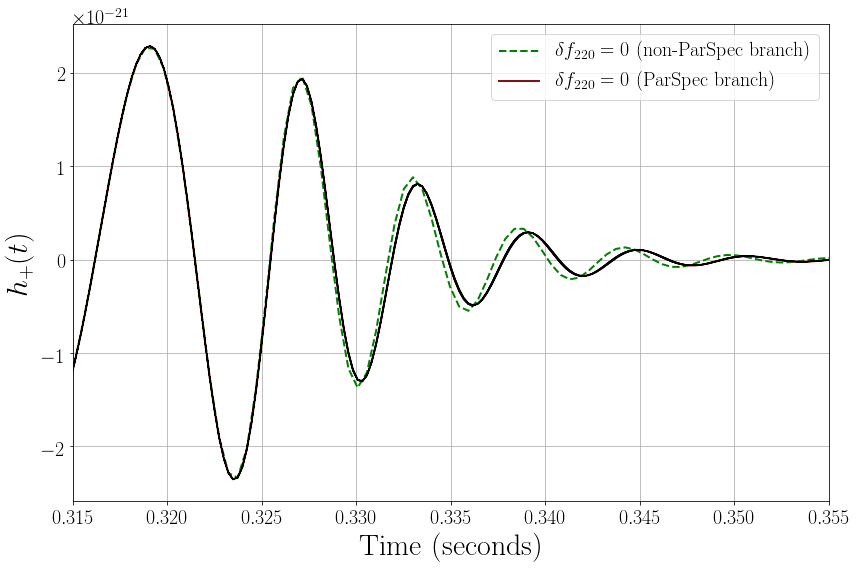

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# plotting pSEOB (non-parspec) data
tnps, hpnps, hcnps = np.genfromtxt("../data/parspec_testing/pSEOB.dat", unpack=True)
ax.plot(tnps, hpnps, color='g', lw=2.0, ls='dashed', label='$\delta f_{220} = 0$ (non-ParSpec branch)')

# plotting no deviation waveform
domega220 = 0.  
    
paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, 0)
lalsimulation.SimInspiralWaveformParamsInsertAlphaNGR(paramdict, 1)
lalsimulation.SimInspiralWaveformParamsInsertPNGR(paramdict, 0)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)

ampoft = np.abs(h)
phioft = np.unwrap(np.angle(h))
Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

ax.plot(time_array, hp.data.data, color='#811112', lw=2.0, label='$\delta f_{220} = 0$ (ParSpec branch)')

for idx in range(100):
    
    domega220 = np.random.rand()*2. - 1.
    print(domega220, alphaNGR, dtau220)
    #alphaNGR = np.random.rand()*10000.

    paramdict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
    lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
    lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
    lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
    lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)
    lalsimulation.SimInspiralWaveformParamsInsertAlphaNGR(paramdict, alphaNGR)
    lalsimulation.SimInspiralWaveformParamsInsertPNGR(paramdict, pNGR)

    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    ampoft = np.abs(h)
    phioft = np.unwrap(np.angle(h))
    Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

    ax.plot(time_array, hp.data.data, color='k', lw=1.0, alpha=0.1)

plt.xlabel('Time (seconds)')
plt.ylabel('$h_+(t)$')

plt.legend(loc='best', fontsize=20)
plt.xlim([0.315, 0.355])
plt.grid()
#plt.show()
plt.tight_layout()
#plt.savefig('../plots/parspec/waveform_domega220_general.png')